### Creating sequence tables and plots/timelines for timber harvest activities completed in Boise National Forest 1967-2018.

#### Author: Katie Murenbeeld
#### Init_Date: 29 July 2019
#### Updated: 

In [1]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
import simpledbf 
from simpledbf import Dbf5 

In [2]:
# Set the directories
raw_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/DATA/FOREST-TREATMENTS/RAW/'
mod_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/DATA/FOREST-TREATMENTS/MOD/'
output_data_dir = '/Users/kathrynmurenbeeld/CODING/FOREST-TREATMENTS/OUTPUT/'

In [3]:
# Convert the most up to date timber harvest data from dbf to csv
#dbf = Dbf5(raw_data_dir + 'S_USA_Activity_TimberHarvest_july2019.dbf', codec='utf-8') # Import the dbf and assign the code 
#dbf.to_csv(mod_data_dir + 'USA_TH_JULY2019.csv') # Covert to csv

In [4]:
# Create dataframe from new csv
df = pd.read_csv(mod_data_dir + 'USA_TH_JULY2019.csv').reset_index()
df.head(1)

,index,ADMIN_FORE,ADMIN_REGI,ADMIN_FO_1,PROCLAIMED,ADMIN_DIST,ADMIN_DI_1,HOME_ORG,ACTIVITY_U,SUID,...,DATA_SOU_1,ACCURACY,CRC_VALUE,UK,EDW_INSERT,ETL_MODIFI,REV_DATE,GIS_ACRES,SHAPE_AREA,SHAPE_LEN
0,0,6,5,Lassen National Forest,506,Almanor Ranger District,51,50651,50651,050651T376000076000,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2018-01-09,25.759,0.000011,0.026648


In [5]:
# Create new data frame for just Boise National Forest
df2 = df.loc[df['ADMIN_FO_1']=='Boise National Forest'].copy().reset_index()
df2.head(5)

,level_0,index,ADMIN_FORE,ADMIN_REGI,ADMIN_FO_1,PROCLAIMED,ADMIN_DIST,ADMIN_DI_1,HOME_ORG,ACTIVITY_U,...,DATA_SOU_1,ACCURACY,CRC_VALUE,UK,EDW_INSERT,ETL_MODIFI,REV_DATE,GIS_ACRES,SHAPE_AREA,SHAPE_LEN
0,314,314,2,4,Boise National Forest,402,Emmett Ranger District,6,40206,40206,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2014-05-15,7.364,0.000003,0.008665
1,415,415,2,4,Boise National Forest,402,Emmett Ranger District,6,40206,40206,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2014-05-09,45.482,0.000021,0.025805
2,1848,1848,2,4,Boise National Forest,402,Lowman Ranger District,5,40205,40205,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2013-04-18,14.647,0.000007,0.020023
3,2618,2618,2,4,Boise National Forest,402,Emmett Ranger District,6,40206,40206,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2014-05-08,37.944,0.000017,0.024540
4,3565,3565,2,4,Boise National Forest,402,Emmett Ranger District,6,40206,40206,...,NaN,0.0,NaN,NaN,2019-07-01,2019-07-01,2014-05-16,21.122,0.000010,0.030803


In [6]:
#Reduce columns for Boise National Forest dataframe
boi = df2[['ADMIN_FO_1','ADMIN_DIST','NEPA_DOC_N','ACTIVITY_2','ACTIVITY_N','NBR_UNITS_','NBR_UNITS1','DATE_PLANN','DATE_AWARD','DATE_COMPL']].copy().reset_index()
boi.head(5)

,index,ADMIN_FO_1,ADMIN_DIST,NEPA_DOC_N,ACTIVITY_2,ACTIVITY_N,NBR_UNITS_,NBR_UNITS1,DATE_PLANN,DATE_AWARD,DATE_COMPL
0,0,Boise National Forest,Emmett Ranger District,(PALS)SIXSHOOTER PROJECT,4131,Shelterwood Establishment Cut (with or without...,7.0,7.0,2009-09-30,2009-09-30,2013-08-13
1,1,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,45.0,45.0,2005-10-15,2005-10-15,NaN
2,2,Boise National Forest,Lowman Ranger District,(PALS)ROCK CREEK RESOURCE MANAGEMENT PROJECT,4220,Commercial Thin,15.0,15.0,2012-05-04,2012-11-07,2013-08-15
3,3,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,38.0,38.0,2009-07-15,2009-07-15,2009-07-15
4,4,Boise National Forest,Emmett Ranger District,(PALS)SCRIVER CREEK INTEGRATED RESTORATION PRO...,4210,Improvement Cut,21.0,21.0,2013-09-26,2013-09-26,NaN


In [7]:
# Group some of the activities together for later use. Use np.select(conditions, choices, default=). 
# Set your conditions to the ACTIVITY_2 codes, use isin() for when multiple codes will be grouped.

conditions = [
    (boi['ACTIVITY_2']==4177),
    (boi['ACTIVITY_2'].isin([4113,4111])),
    (boi['ACTIVITY_2']==4151),
    (boi['ACTIVITY_2']==4152),
    (boi['ACTIVITY_2'].isin([4121,4141,4145,4131,4148,4193,4194,4196,4132])),
    (boi['ACTIVITY_2'].isin([4231,4232,4210,4211])),
    (boi['ACTIVITY_2']==4143),
    (boi['ACTIVITY_2']==4220),
    (boi['ACTIVITY_2']==4242)
]
choices = ['A2_CLEARCUT','EA_CLEARCUT','UA_SINGLE','UA_GROUP','UA_SHELTER','INT_CUT','OVERSTORE_CUT','COMM_THIN','HARV_NOSTOCK']

In [8]:
# Use np.select() to create a new column with the coded/grouped activities.

boi['new_code'] = np.select(conditions, choices, default='none')
boi.head(5) # check the data

,index,ADMIN_FO_1,ADMIN_DIST,NEPA_DOC_N,ACTIVITY_2,ACTIVITY_N,NBR_UNITS_,NBR_UNITS1,DATE_PLANN,DATE_AWARD,DATE_COMPL,new_code
0,0,Boise National Forest,Emmett Ranger District,(PALS)SIXSHOOTER PROJECT,4131,Shelterwood Establishment Cut (with or without...,7.0,7.0,2009-09-30,2009-09-30,2013-08-13,UA_SHELTER
1,1,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,45.0,45.0,2005-10-15,2005-10-15,NaN,COMM_THIN
2,2,Boise National Forest,Lowman Ranger District,(PALS)ROCK CREEK RESOURCE MANAGEMENT PROJECT,4220,Commercial Thin,15.0,15.0,2012-05-04,2012-11-07,2013-08-15,COMM_THIN
3,3,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,38.0,38.0,2009-07-15,2009-07-15,2009-07-15,COMM_THIN
4,4,Boise National Forest,Emmett Ranger District,(PALS)SCRIVER CREEK INTEGRATED RESTORATION PRO...,4210,Improvement Cut,21.0,21.0,2013-09-26,2013-09-26,NaN,INT_CUT


In [9]:
# Convert DATE_* columns to datetime. Add a new column for the serial dates
bnf_datearrP = boi['DATE_PLANN'].values
bnf_datearr_dtP = pd.to_datetime(bnf_datearrP)
boi['SerDatesPlan'] = bnf_datearr_dtP

bnf_datearrA = boi['DATE_AWARD'].values
bnf_datearr_dtA = pd.to_datetime(bnf_datearrA)
boi['SerDatesAward'] = bnf_datearr_dtA

bnf_datearrC = boi['DATE_COMPL'].values
bnf_datearr_dtC = pd.to_datetime(bnf_datearrC)
boi['SerDatesComp'] = bnf_datearr_dtC

In [10]:
boi.head(1) # Check the data

,index,ADMIN_FO_1,ADMIN_DIST,NEPA_DOC_N,ACTIVITY_2,ACTIVITY_N,NBR_UNITS_,NBR_UNITS1,DATE_PLANN,DATE_AWARD,DATE_COMPL,new_code,SerDatesPlan,SerDatesAward,SerDatesComp
0,0,Boise National Forest,Emmett Ranger District,(PALS)SIXSHOOTER PROJECT,4131,Shelterwood Establishment Cut (with or without...,7.0,7.0,2009-09-30,2009-09-30,2013-08-13,UA_SHELTER,2009-09-30,2009-09-30,2013-08-13


In [11]:
# Here I will sort out the data so that only items planned to be completed before 2019 
# are included.

BOI2018 = boi.loc[boi['SerDatesPlan'] <= '2018-12-31'].copy()
BOI2018.head(5) # Check the data

,index,ADMIN_FO_1,ADMIN_DIST,NEPA_DOC_N,ACTIVITY_2,ACTIVITY_N,NBR_UNITS_,NBR_UNITS1,DATE_PLANN,DATE_AWARD,DATE_COMPL,new_code,SerDatesPlan,SerDatesAward,SerDatesComp
0,0,Boise National Forest,Emmett Ranger District,(PALS)SIXSHOOTER PROJECT,4131,Shelterwood Establishment Cut (with or without...,7.0,7.0,2009-09-30,2009-09-30,2013-08-13,UA_SHELTER,2009-09-30,2009-09-30,2013-08-13
1,1,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,45.0,45.0,2005-10-15,2005-10-15,NaN,COMM_THIN,2005-10-15,2005-10-15,NaT
2,2,Boise National Forest,Lowman Ranger District,(PALS)ROCK CREEK RESOURCE MANAGEMENT PROJECT,4220,Commercial Thin,15.0,15.0,2012-05-04,2012-11-07,2013-08-15,COMM_THIN,2012-05-04,2012-11-07,2013-08-15
3,3,Boise National Forest,Emmett Ranger District,NORTH KENNEDY-COTTONWOOD TS,4220,Commercial Thin,38.0,38.0,2009-07-15,2009-07-15,2009-07-15,COMM_THIN,2009-07-15,2009-07-15,2009-07-15
4,4,Boise National Forest,Emmett Ranger District,(PALS)SCRIVER CREEK INTEGRATED RESTORATION PRO...,4210,Improvement Cut,21.0,21.0,2013-09-26,2013-09-26,NaN,INT_CUT,2013-09-26,2013-09-26,NaT


In [12]:
print(BOI2018['SerDatesPlan'].min(), BOI2018['SerDatesPlan'].max()) # Check the date range.

1967-06-01 00:00:00 2018-12-19 00:00:00


{'UA_SHELTER': (1.0, 1.0, 0.0),
 'COMM_THIN': (0.8, 0.0, 0.0),
 'INT_CUT': (0.6, 0.2, 1.0),
 'UA_SINGLE': (1.0, 0.6, 0.2),
 'EA_CLEARCUT': (0.0, 0.8, 0.4),
 'UA_GROUP': (0.0, 1.0, 1.0),
 'OVERSTORE_CUT': (0.8784313725490196, 0.8784313725490196, 0.8784313725490196),
 'HARV_NOSTOCK': (1.0, 0.6, 0.8)}

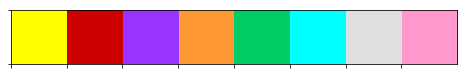

In [105]:
# I want to set the activity code (new_code) to a color_map for use when creating project sequence plots

# Set unique category labels
color_labels = BOI2018['new_code'].unique()
# List of RGB triplets
colors = [(1,1,0),(204/255,0,0),(153/255,51/255,255/255),(255/255,153/255,51/255),(0,204/255,102/255),(0,255/255,255/255),(224/255,224/255,224/255),(255/255,153/255,204/255)]
see_colors = sns.palplot(sns.color_palette(colors))
color_values = sns.color_palette(colors)
#values = sns.color_palette("colors",8)

# Map label to RGB
#color_map = dict(zip(color_labels, rgb_values))

#Map label to custom color palette
color_map = dict(zip(color_labels, color_values))

color_map # Check color_map

In [84]:
# Define a function to separate the dataset by the NEPA project name.
# This function will return the area treated by activity name and activity code

def projectdf(projname):
    test = BOI2018.loc[BOI2018['NEPA_DOC_N']== (projname)].copy()
    #test2 = test[['NEPA_DOC_N','new_code','SerDatesComp','NBR_UNITS1']].groupby(['new_code','SerDatesComp'])['NBR_UNITS1'].sum().sort_values('SerDatesComp', axis=1).reset_index()
    test = test[['NEPA_DOC_N','new_code','SerDatesComp','NBR_UNITS1']].reset_index()
    test = test.groupby(['new_code','SerDatesComp'])['NBR_UNITS1'].sum().reset_index()
    test = test.sort_values(by=['SerDatesComp']).reset_index()
    print(projname)
    return test

In [85]:
ssp=projectdf('(PALS)SIXSHOOTER PROJECT')
ssp

(PALS)SIXSHOOTER PROJECT


,index,new_code,SerDatesComp,NBR_UNITS1
0,0,COMM_THIN,2011-08-15,509.0
1,6,UA_SHELTER,2011-08-15,24.0
2,1,COMM_THIN,2011-09-15,84.0
3,7,UA_SHELTER,2011-09-15,63.0
4,2,COMM_THIN,2012-07-15,35.0
5,3,COMM_THIN,2012-08-01,126.0
6,8,UA_SHELTER,2012-08-01,23.0
7,5,INT_CUT,2012-08-02,22.0
8,9,UA_SHELTER,2012-09-04,59.0
9,4,COMM_THIN,2012-09-13,278.0


In [86]:
ssp['new_code'].unique()

array(['COMM_THIN', 'UA_SHELTER', 'INT_CUT'], dtype=object)

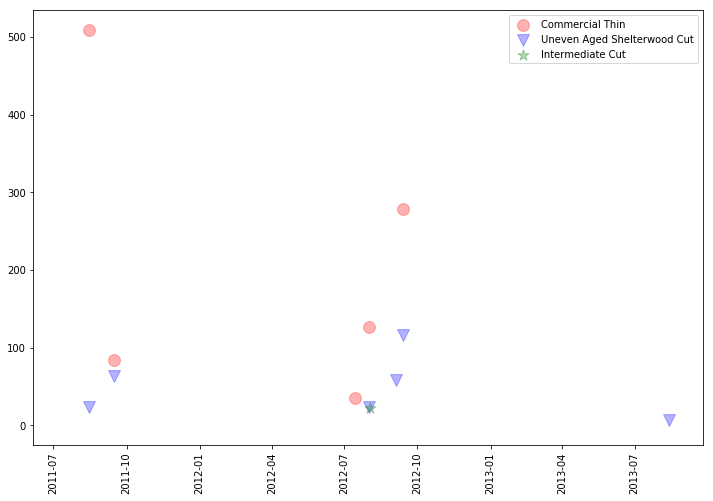

In [87]:
fig = plt.figure(figsize = (12,8))

sz = 140

ct = ssp.loc[ssp['new_code']=='COMM_THIN'].copy()
ct_x=ct['SerDatesComp']
ct_y=ct['NBR_UNITS1'].values

us =  ssp.loc[ssp['new_code']=='UA_SHELTER'].copy()
us_x=us['SerDatesComp']
us_y=us['NBR_UNITS1'].values

inter =  ssp.loc[ssp['new_code']=='INT_CUT'].copy()
inter_x=inter['SerDatesComp']
inter_y=inter['NBR_UNITS1'].values

#plt.plot_date(ct_x, ct_y, c='r', alpha=0.3, marker ='o', label='Commercial Thin')
#plt.plot_date(us_x, us_y, c='b', alpha=0.3, marker ='v',label='Uneven Aged Shelterwood Cut')
plt.scatter(ct_x, ct_y, sz, c='r', alpha=0.3, marker ='o', label='Commercial Thin')
plt.scatter(us_x, us_y, sz, c='b', alpha=0.3, marker ='v', label='Uneven Aged Shelterwood Cut')
plt.scatter(inter_x, inter_y, sz, c='g', alpha=0.3, marker ='*', label='Intermediate Cut')
plt.xticks(rotation=90)
plt.legend()

plt.show()

In [88]:
print(ct,us,inter)

   index   new_code SerDatesComp  NBR_UNITS1
0      0  COMM_THIN   2011-08-15       509.0
2      1  COMM_THIN   2011-09-15        84.0
4      2  COMM_THIN   2012-07-15        35.0
5      3  COMM_THIN   2012-08-01       126.0
9      4  COMM_THIN   2012-09-13       278.0     index    new_code SerDatesComp  NBR_UNITS1
1       6  UA_SHELTER   2011-08-15        24.0
3       7  UA_SHELTER   2011-09-15        63.0
6       8  UA_SHELTER   2012-08-01        23.0
8       9  UA_SHELTER   2012-09-04        59.0
10     10  UA_SHELTER   2012-09-13       116.0
11     11  UA_SHELTER   2013-08-13         7.0    index new_code SerDatesComp  NBR_UNITS1
7      5  INT_CUT   2012-08-02        22.0


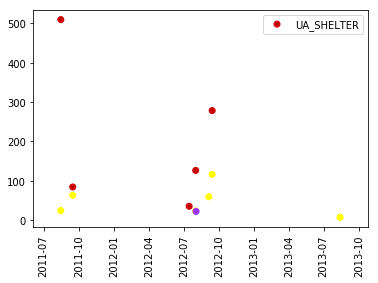

In [111]:
x=ssp['SerDatesComp']
y=ssp['NBR_UNITS1'].values

plt.scatter(x, y, c=ssp['new_code'].map(color_map))
plt.legend(color_map)
plt.xticks(rotation=90)
#plt.scatter(ic_x,ic_y)
#plt.scatter(sec_x,sec_y)
plt.show()

In [112]:
def plotNEPAcomp(project,activity1=(),activity2=(),activity3=()):
    data1 = project.loc[project['new_code'] == activity1].copy()
    x1 = data1['SerDatesComp']
    y1 = data1['NBR_UNITS1'].values
    
    data2 = project.loc[project['new_code'] == activity2].copy()
    x2 = data2['SerDatesComp']
    y2 = data2['NBR_UNITS1'].values
    
    data3 = project.loc[project['new_code'] == activity3].copy()
    x3 = data3['SerDatesComp']
    y3 = data3['NBR_UNITS1'].values
    
    fig = plt.figure(figsize = (12,8))
    sz = 140
    plt.scatter(x1, y1, sz, c='r', alpha=0.3, marker ='o', label=activity1)
    plt.scatter(x2, y2, sz, c='g', alpha=0.3, marker ='v',label=activity2)
    plt.scatter(x3, y3, sz, c='b', alpha=0.3, marker ='*', label=activity3)
    #plt.title('Project'+project)
    #plt.text("Project Name is {}".format(project))
    plt.xlabel('Completion Date')
    plt.ylabel('Area Treated')
    plt.xticks(rotation=90)
    plt.legend()
    # extra plot specifics: title, x and y axis labels, etc.
    plt.show()
    #return ([x1,y1],[x2,y2],[x3,y3])

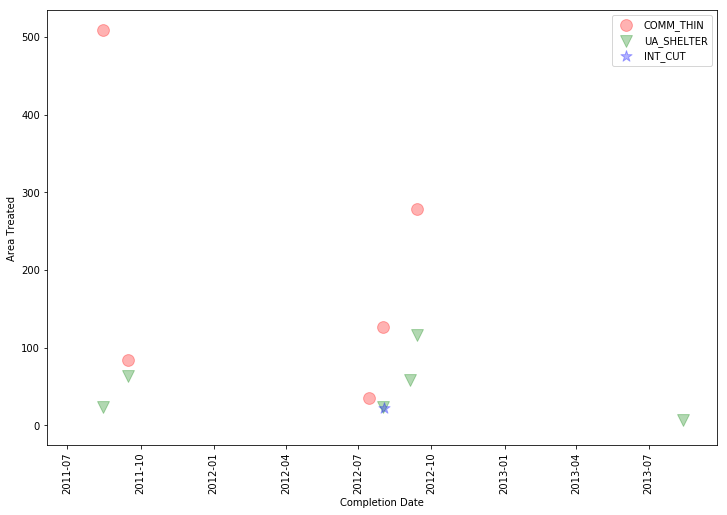

In [113]:
plotNEPAcomp(ssp, 'COMM_THIN','UA_SHELTER','INT_CUT')

In [114]:
BOI2018['NEPA_DOC_N'].unique()

array(['(PALS)SIXSHOOTER PROJECT', 'NORTH KENNEDY-COTTONWOOD TS',
       '(PALS)ROCK CREEK RESOURCE MANAGEMENT PROJECT',
       '(PALS)SCRIVER CREEK INTEGRATED RESTORATION PROJECT',
       'DEFAULT FOR NOT REQUIRED',
       '(PALS)TRINITY RIDGE FIRE ROADSIDE SALVAGE PROJECT DECISION MEMO',
       'AIRLINE PROJECT', 'WARM SPRINGS RIDGE VEG. MGT. PROJECT',
       '(PALS)HIGH VALLEY INTEGRATED RESTORATION PROJECT',
       '(PALS)WHITE FLAT RESOURCE MANAGEMENT PROJECT', 'PRINCE JOHN',
       'MESA PROJECT', '(PALS)AIRLINE VEGETATION MANAGEMENT PROJECT',
       '(PALS)WILLIAMS CREEK PROJECT DECISION MEMO',
       '(PALS)ROADSIDE HAZARD TREE REMOVAL DECISION NOTICE &FONSI',
       '(PALS)BRUSH BOULDER',
       '(PALS)UPPER MIDDLE FORK PAYETTE RIVER DECISION NOTICE AND FONSI',
       '(PALS)WEST MOUNTAIN NORTH RECORD OF DECISION',
       '(PALS)STAR RANCH FUELS REDUCTION PROJECT',
       '(PALS)MIDDLE FORK SALVAGE DECISION NOTICE', 'SILVER CREEK',
       '(PALS)MORES SOUTH FUEL REDUCTION PROJ

In [115]:
nkcts=projectdf('NORTH KENNEDY-COTTONWOOD TS')
nkcts

NORTH KENNEDY-COTTONWOOD TS


,index,new_code,SerDatesComp,NBR_UNITS1
0,0,COMM_THIN,2005-10-15,39.0
1,6,INT_CUT,2005-10-15,32.0
2,1,COMM_THIN,2006-10-15,35.0
3,2,COMM_THIN,2007-09-15,697.0
4,8,UA_SHELTER,2007-09-15,164.0
5,3,COMM_THIN,2008-12-15,527.0
6,7,INT_CUT,2008-12-15,12.0
7,9,UA_SHELTER,2008-12-15,8.0
8,4,COMM_THIN,2009-07-15,318.0
9,5,COMM_THIN,2009-07-30,42.0


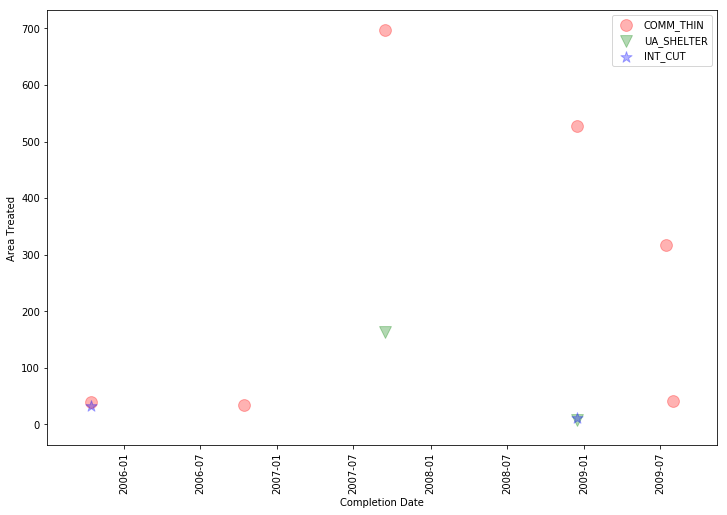

In [116]:
plotNEPAcomp(nkcts, 'COMM_THIN','UA_SHELTER','INT_CUT')

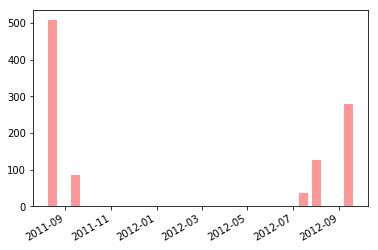

In [165]:
fig, ax = plt.subplots(sharex=True)

w = 12
x = ssp['SerDatesComp']
ct = ssp.loc[ssp['new_code']=='COMM_THIN'].copy()
ct_x=ct['SerDatesComp']
ct_y=ct['NBR_UNITS1'].values

us =  ssp.loc[ssp['new_code']=='UA_SHELTER'].copy()
us_x=us['SerDatesComp']
us_y=us['NBR_UNITS1'].values

inter =  ssp.loc[ssp['new_code']=='INT_CUT'].copy()
inter_x=inter['SerDatesComp']
inter_y=inter['NBR_UNITS1'].values

ax.bar(ct_x, ct_y,w,color='r',alpha=0.4)
#ax.bar(us_x, us_y,w,color='g',alpha=0.4)
#ax.bar(inter_x, inter_y,w,color='b',alpha=0.4)
fig.autofmt_xdate()
plt.show()

# Son of bitch.  I just spent several hours trying to figure this out...and this was super easy to do.

 Maybe try this tonight or tomorrow?

 https://matplotlib.org/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py

In [184]:
def barNEPAcomp(project,activity1=(),activity2=(),activity3=()):
    fig, ax = plt.subplots(figsize=(20,12),sharex=True)
    w = 10
    
    data1 = project.loc[project['new_code'] == activity1].copy()
    x1 = data1['SerDatesComp']
    y1 = data1['NBR_UNITS1'].values
    
    data2 = project.loc[project['new_code'] == activity2].copy()
    x2 = data2['SerDatesComp']
    y2 = data2['NBR_UNITS1'].values
    
    data3 = project.loc[project['new_code'] == activity3].copy()
    x3 = data3['SerDatesComp']
    y3 = data3['NBR_UNITS1'].values
    
    
    ax.bar(x1, y1, w, color='r', alpha=0.1, label=activity1)
    ax.bar(x2, y2, w, color='g', alpha=0.35, label=activity2)
    #ax.bar(x2, y2, w, color=project['new_code'].map(color_map), alpha=0.35, label=activity2)
    ax.bar(x3, y3, w, color='orange', alpha = 0.35, label=activity3)
    #ax.bar(x3, y3, w, color=project['new_code'].map(color_map), label=activity3)
    #plt.title(title)
    #plt.text("Project Name is {}".format(project))
    plt.xlabel('Completion Date')
    plt.ylabel('Area Treated')
    plt.xticks(rotation=90)
    fig.autofmt_xdate()
    plt.legend()
    # extra plot specifics: title, x and y axis labels, etc.
    plt.show()

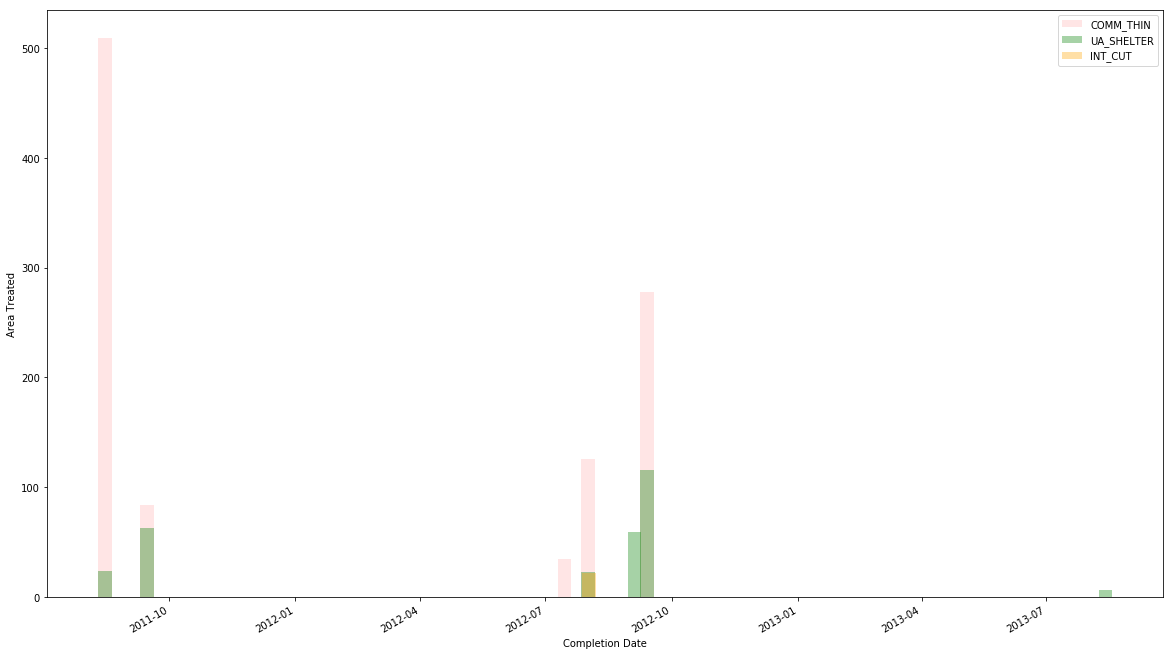

In [185]:
barNEPAcomp(ssp,'COMM_THIN','UA_SHELTER','INT_CUT')

End of night: 29 July 2019 For some reason the color map isn't working correctly...I think it may just be easier to do these one at a time instead of fiddling with a function. I feel like a function will be useful for creating the tables though and once I get to the creating of the pdfs and markov chain part.